In [3]:
import os
import sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
COMPUTER_NAME = '/home/renata'
#use python 3

In [4]:
EPS = 1.2
EPS_PO = 0.02
CLUSTERING_NAME = "{0}-{1}".format(EPS,EPS_PO)
MAX_GEN = 1500

## Choose experiment

In [19]:
# all_exps_infos = {'AQUA':[1,30,4,'CPPN'],'MARS':[1,30,4,'CPPN'],'EARTH':[1,30,4,'CPPN']}
# exp_list_name = 'CPPN_4^3' 

# all_exps_infos = {'AQUA':[1,20,4,'DE'],'MARS':[1,20,4,'DE'],'EARTH':[1,20,4,'DE']}
# exp_list_name = 'DE_4^3'

all_exps_infos = {'AQUA':[1,30,6,'CPPN'],'MARS':[1,30,6,'CPPN'],'EARTH':[1,30,6,'CPPN']}
exp_list_name = 'CPPN_6^3' 

# all_exps_infos = {'AQUA':[1,5,8,'CPPN'],'MARS':[1,5,8,'CPPN'],'EARTH':[1,5,8,'CPPN']}
# exp_list_name = 'CPPN_8^3'


In [20]:
total_data = pd.DataFrame()
for ENV in all_exps_infos:
        SEED_INIT = all_exps_infos[ENV][0]
        SEED_END = all_exps_infos[ENV][1]
        SIZE = all_exps_infos[ENV][2]
        GENOTYPE = all_exps_infos[ENV][3]
        
        if GENOTYPE == 'CPPN':
                EXP_NAME = 'Final_{0}_{1}'.format(SIZE,ENV)
        elif GENOTYPE == 'DE':
                EXP_NAME = 'Final_{0}_{1}_DirectEncode'.format(SIZE,ENV)

        try:
            with open("{0}/locomotion_principles/article_figs/Fig2/AvgDegree/AvgDegreeData/TopologyCalcs_{1}.pickle".format(COMPUTER_NAME,EXP_NAME), 'rb') as handle:
                d = pickle.load(handle,encoding='latin1')

        except:
                sys.path.append('{0}/locomotion_principles/article_figs/'.format(COMPUTER_NAME))
                from create_data_for_figs import create_avgdegree_data
                print('Need to create pickle')
                d = create_avgdegree_data(ENV,SIZE,SEED_INIT,SEED_END, EXP_NAME,1500,CLUSTERING_NAME)
                
        Expdata = pd.DataFrame(data = d)
        total_data = total_data.append(Expdata)

data = pd.DataFrame()
data = data.append(total_data[(total_data.Env == 'AQUA') & (total_data.Stiffness == 5e5)])
data = data.append(total_data[(total_data.Env == 'MARS') & (total_data.Stiffness == 5e7)])
data = data.append(total_data[(total_data.Env == 'EARTH') & (total_data.Stiffness == 5e7)])
print('FINISH - generating data frames to plot')

FINISH - generating data frames to plot


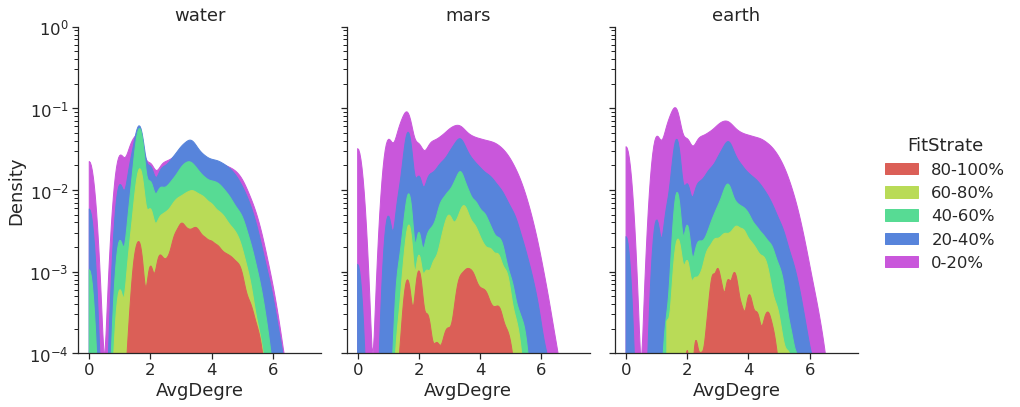

In [21]:
sns.set(font_scale=1.5)  # good size
sns.set_style("white")
sns.set_style("ticks")

g = sns.displot(data=total_data,kind = 'kde',
        x = 'AvgDegre',log_scale = [False,True],
        hue = 'FitStrate',col='Env',
        hue_order = ['80-100%','60-80%','40-60%','20-40%','0-20%'],
        common_norm = True,
        alpha = 1,
        palette= sns.color_palette("hls", 5),
        cut=0,fill=True
        ,bw_method= 0.1 
        ,bw_adjust = 1,
        height = 6,
        aspect = 0.7
        )
min = 1/(10**4)
max = 1/(10**1)
count = 0
for ax in g.axes.flat:
    if count == 0:
        EXP = 'water'
    elif count == 1:
        EXP = 'mars'
    elif count == 2:
        EXP = 'earth'
    ax.set_title('{0}'.format(EXP))
    count +=1
plt.ylim(min,1)
plt.savefig('Plots/AvgDegreeXFit_5Layers_{0}.png'.format(exp_list_name),bbox_inches="tight")
